In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

/opt/anaconda3/lib/python3.8/site-packages/lightgbm/__init__.py:42: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  warnings.warn("Starting from version 2.2.1, the library file in distribution wheels for macOS "


In [ ]:
data = pd.read_csv("match_total.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (933,934,976,977) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21374 entries, 0 to 21373
Columns: 1019 entries, country_id to away_team_id_defenceDefenderLineClass_Offside Trap
dtypes: float64(962), int64(30), object(27)
memory usage: 166.2+ MB


In [ ]:
# drop columns that are all NaNs
data = data.dropna(axis=1, how='all')

In [ ]:
y = (data["home_team_goal"] - data["away_team_goal"]).values

In [ ]:
drop_columns = ["home_team_goal", "away_team_goal"]
for column in data.columns:
    if data[column].dtype == "object":
        drop_columns.append(column)

In [ ]:
drop_columns

['home_team_goal',
 'away_team_goal',
 'date',
 'home_player_1_player_name',
 'home_player_2_player_name',
 'home_player_3_player_name',
 'home_player_4_player_name',
 'home_player_5_player_name',
 'home_player_6_player_name',
 'home_player_7_player_name',
 'home_player_8_player_name',
 'home_player_9_player_name',
 'home_player_10_player_name',
 'home_player_11_player_name',
 'away_player_1_player_name',
 'away_player_2_player_name',
 'away_player_3_player_name',
 'away_player_4_player_name',
 'away_player_5_player_name',
 'away_player_6_player_name',
 'away_player_7_player_name',
 'away_player_8_player_name',
 'away_player_9_player_name',
 'away_player_10_player_name',
 'away_player_11_player_name',
 'home_team_id_team_long_name',
 'home_team_id_team_short_name',
 'away_team_id_team_long_name',
 'away_team_id_team_short_name']

In [ ]:
x_values = data.drop(columns=drop_columns)

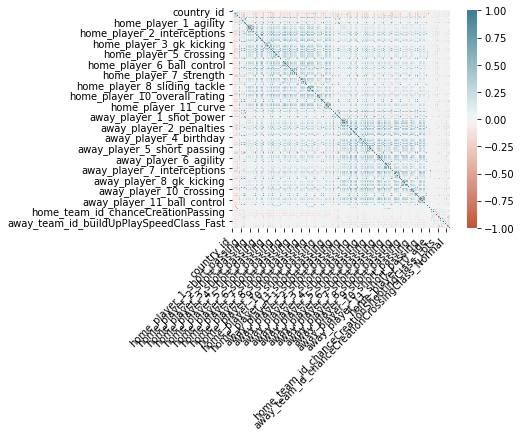

In [ ]:
corr = data[[i for i in data.columns]].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
x_train_gbm, x_val_gbm, y_train_gbm, y_val_gbm = train_test_split(x_values, y, train_size=0.85, random_state=1)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'max_depth': 100,
    'seed': 1
}
lgb_train = lgb.Dataset(x_train_gbm, y_train_gbm, feature_name=list(x_values.columns))
lgb_eval = lgb.Dataset(x_val_gbm, y_val_gbm, feature_name=list(x_values.columns))
model2 = lgb.train(params, lgb_train, num_boost_round=10000, valid_sets=[lgb_train, lgb_eval], 
                valid_names=["train", "eval"], early_stopping_rounds=1500, verbose_eval=True)
y_pred_train = model2.predict(x_values, num_iteration=model2.best_iteration)
acc_lgb_train = mean_squared_error(y, y_pred_train, squared=False)

print("RMSE in train set is: " + str(round(acc_lgb_train, 4)))

[1]	train's l2: 3.22924	eval's l2: 3.06395
Training until validation scores don't improve for 1500 rounds
[2]	train's l2: 3.21949	eval's l2: 3.05604
[3]	train's l2: 3.20993	eval's l2: 3.04832
[4]	train's l2: 3.20042	eval's l2: 3.04069
[5]	train's l2: 3.1909	eval's l2: 3.03319
[6]	train's l2: 3.18168	eval's l2: 3.02621
[7]	train's l2: 3.17261	eval's l2: 3.01924
[8]	train's l2: 3.16367	eval's l2: 3.01243
[9]	train's l2: 3.15472	eval's l2: 3.00572
[10]	train's l2: 3.14599	eval's l2: 2.99902
[11]	train's l2: 3.13729	eval's l2: 2.992
[12]	train's l2: 3.12876	eval's l2: 2.98516
[13]	train's l2: 3.12003	eval's l2: 2.9787
[14]	train's l2: 3.11162	eval's l2: 2.97185
[15]	train's l2: 3.10339	eval's l2: 2.96557
[16]	train's l2: 3.09517	eval's l2: 2.95951
[17]	train's l2: 3.08686	eval's l2: 2.95326
[18]	train's l2: 3.0788	eval's l2: 2.94757
[19]	train's l2: 3.07078	eval's l2: 2.94136
[20]	train's l2: 3.06287	eval's l2: 2.93583
[21]	train's l2: 3.05494	eval's l2: 2.93012
[22]	train's l2: 3.04705	ev

[188]	train's l2: 2.41635	eval's l2: 2.57113
[189]	train's l2: 2.4145	eval's l2: 2.57068
[190]	train's l2: 2.41255	eval's l2: 2.57027
[191]	train's l2: 2.41057	eval's l2: 2.56978
[192]	train's l2: 2.40863	eval's l2: 2.5693
[193]	train's l2: 2.40671	eval's l2: 2.56895
[194]	train's l2: 2.40472	eval's l2: 2.56851
[195]	train's l2: 2.40282	eval's l2: 2.56801
[196]	train's l2: 2.40086	eval's l2: 2.5676
[197]	train's l2: 2.39894	eval's l2: 2.56727
[198]	train's l2: 2.39707	eval's l2: 2.56683
[199]	train's l2: 2.39514	eval's l2: 2.56631
[200]	train's l2: 2.39323	eval's l2: 2.56589
[201]	train's l2: 2.3913	eval's l2: 2.56564
[202]	train's l2: 2.38938	eval's l2: 2.56523
[203]	train's l2: 2.3875	eval's l2: 2.5647
[204]	train's l2: 2.38564	eval's l2: 2.56429
[205]	train's l2: 2.38385	eval's l2: 2.56364
[206]	train's l2: 2.38204	eval's l2: 2.56328
[207]	train's l2: 2.3802	eval's l2: 2.5631
[208]	train's l2: 2.37834	eval's l2: 2.56288
[209]	train's l2: 2.37653	eval's l2: 2.56258
[210]	train's l2: 

[375]	train's l2: 2.13876	eval's l2: 2.53163
[376]	train's l2: 2.13756	eval's l2: 2.53113
[377]	train's l2: 2.13644	eval's l2: 2.53082
[378]	train's l2: 2.13528	eval's l2: 2.53065
[379]	train's l2: 2.13415	eval's l2: 2.5304
[380]	train's l2: 2.13291	eval's l2: 2.53048
[381]	train's l2: 2.1317	eval's l2: 2.53026
[382]	train's l2: 2.13043	eval's l2: 2.53015
[383]	train's l2: 2.12928	eval's l2: 2.53008
[384]	train's l2: 2.12804	eval's l2: 2.52984
[385]	train's l2: 2.12685	eval's l2: 2.52982
[386]	train's l2: 2.12562	eval's l2: 2.52985
[387]	train's l2: 2.12446	eval's l2: 2.5299
[388]	train's l2: 2.12323	eval's l2: 2.52993
[389]	train's l2: 2.12206	eval's l2: 2.52997
[390]	train's l2: 2.1209	eval's l2: 2.52986
[391]	train's l2: 2.11976	eval's l2: 2.5298
[392]	train's l2: 2.11858	eval's l2: 2.52983
[393]	train's l2: 2.11744	eval's l2: 2.5301
[394]	train's l2: 2.11628	eval's l2: 2.5301
[395]	train's l2: 2.11511	eval's l2: 2.53035
[396]	train's l2: 2.11396	eval's l2: 2.53012
[397]	train's l2:

[566]	train's l2: 1.93916	eval's l2: 2.52867
[567]	train's l2: 1.9381	eval's l2: 2.52855
[568]	train's l2: 1.93712	eval's l2: 2.5283
[569]	train's l2: 1.93616	eval's l2: 2.5282
[570]	train's l2: 1.93522	eval's l2: 2.52802
[571]	train's l2: 1.9342	eval's l2: 2.52788
[572]	train's l2: 1.93324	eval's l2: 2.52759
[573]	train's l2: 1.93223	eval's l2: 2.52749
[574]	train's l2: 1.93129	eval's l2: 2.52753
[575]	train's l2: 1.93033	eval's l2: 2.52755
[576]	train's l2: 1.92937	eval's l2: 2.52753
[577]	train's l2: 1.92839	eval's l2: 2.52779
[578]	train's l2: 1.92743	eval's l2: 2.52786
[579]	train's l2: 1.92652	eval's l2: 2.52782
[580]	train's l2: 1.92557	eval's l2: 2.52787
[581]	train's l2: 1.92456	eval's l2: 2.52792
[582]	train's l2: 1.92369	eval's l2: 2.52774
[583]	train's l2: 1.92265	eval's l2: 2.5277
[584]	train's l2: 1.92175	eval's l2: 2.52766
[585]	train's l2: 1.92069	eval's l2: 2.52776
[586]	train's l2: 1.91965	eval's l2: 2.52793
[587]	train's l2: 1.91866	eval's l2: 2.52803
[588]	train's l

[750]	train's l2: 1.78067	eval's l2: 2.52909
[751]	train's l2: 1.77993	eval's l2: 2.52925
[752]	train's l2: 1.77907	eval's l2: 2.52932
[753]	train's l2: 1.77833	eval's l2: 2.52939
[754]	train's l2: 1.77766	eval's l2: 2.52972
[755]	train's l2: 1.77694	eval's l2: 2.52975
[756]	train's l2: 1.77618	eval's l2: 2.52984
[757]	train's l2: 1.77535	eval's l2: 2.52984
[758]	train's l2: 1.77457	eval's l2: 2.52981
[759]	train's l2: 1.77383	eval's l2: 2.52995
[760]	train's l2: 1.77298	eval's l2: 2.52991
[761]	train's l2: 1.77215	eval's l2: 2.5298
[762]	train's l2: 1.77133	eval's l2: 2.5295
[763]	train's l2: 1.77051	eval's l2: 2.52943
[764]	train's l2: 1.76971	eval's l2: 2.52928
[765]	train's l2: 1.76887	eval's l2: 2.52935
[766]	train's l2: 1.76805	eval's l2: 2.52969
[767]	train's l2: 1.76725	eval's l2: 2.52971
[768]	train's l2: 1.7664	eval's l2: 2.52966
[769]	train's l2: 1.76557	eval's l2: 2.52992
[770]	train's l2: 1.7648	eval's l2: 2.5301
[771]	train's l2: 1.7641	eval's l2: 2.53018
[772]	train's l2

[935]	train's l2: 1.64169	eval's l2: 2.53038
[936]	train's l2: 1.6409	eval's l2: 2.53042
[937]	train's l2: 1.64018	eval's l2: 2.53036
[938]	train's l2: 1.63951	eval's l2: 2.53042
[939]	train's l2: 1.63883	eval's l2: 2.53044
[940]	train's l2: 1.6382	eval's l2: 2.53047
[941]	train's l2: 1.63761	eval's l2: 2.53029
[942]	train's l2: 1.63695	eval's l2: 2.53026
[943]	train's l2: 1.63634	eval's l2: 2.53006
[944]	train's l2: 1.63574	eval's l2: 2.52996
[945]	train's l2: 1.63507	eval's l2: 2.52982
[946]	train's l2: 1.63431	eval's l2: 2.52985
[947]	train's l2: 1.63355	eval's l2: 2.52993
[948]	train's l2: 1.63276	eval's l2: 2.53006
[949]	train's l2: 1.63201	eval's l2: 2.53017
[950]	train's l2: 1.6313	eval's l2: 2.53028
[951]	train's l2: 1.63061	eval's l2: 2.53046
[952]	train's l2: 1.62983	eval's l2: 2.53052
[953]	train's l2: 1.62895	eval's l2: 2.53052
[954]	train's l2: 1.62812	eval's l2: 2.53051
[955]	train's l2: 1.62738	eval's l2: 2.53051
[956]	train's l2: 1.62672	eval's l2: 2.53063
[957]	train's

[1122]	train's l2: 1.51368	eval's l2: 2.53323
[1123]	train's l2: 1.51294	eval's l2: 2.53339
[1124]	train's l2: 1.51223	eval's l2: 2.53342
[1125]	train's l2: 1.51157	eval's l2: 2.5334
[1126]	train's l2: 1.51086	eval's l2: 2.53342
[1127]	train's l2: 1.51016	eval's l2: 2.53352
[1128]	train's l2: 1.50945	eval's l2: 2.53336
[1129]	train's l2: 1.50889	eval's l2: 2.53334
[1130]	train's l2: 1.50817	eval's l2: 2.53336
[1131]	train's l2: 1.50746	eval's l2: 2.53332
[1132]	train's l2: 1.50675	eval's l2: 2.53321
[1133]	train's l2: 1.50611	eval's l2: 2.53317
[1134]	train's l2: 1.50543	eval's l2: 2.53317
[1135]	train's l2: 1.50479	eval's l2: 2.53312
[1136]	train's l2: 1.50412	eval's l2: 2.53314
[1137]	train's l2: 1.50356	eval's l2: 2.53341
[1138]	train's l2: 1.50298	eval's l2: 2.53352
[1139]	train's l2: 1.50244	eval's l2: 2.5336
[1140]	train's l2: 1.50183	eval's l2: 2.53362
[1141]	train's l2: 1.50124	eval's l2: 2.53367
[1142]	train's l2: 1.50064	eval's l2: 2.53368
[1143]	train's l2: 1.50005	eval's l2

[1305]	train's l2: 1.3996	eval's l2: 2.53667
[1306]	train's l2: 1.39895	eval's l2: 2.5368
[1307]	train's l2: 1.39834	eval's l2: 2.53681
[1308]	train's l2: 1.39777	eval's l2: 2.53702
[1309]	train's l2: 1.39721	eval's l2: 2.53708
[1310]	train's l2: 1.39669	eval's l2: 2.53704
[1311]	train's l2: 1.39599	eval's l2: 2.53732
[1312]	train's l2: 1.39531	eval's l2: 2.53751
[1313]	train's l2: 1.39474	eval's l2: 2.53745
[1314]	train's l2: 1.39413	eval's l2: 2.53752
[1315]	train's l2: 1.39343	eval's l2: 2.53753
[1316]	train's l2: 1.39287	eval's l2: 2.53751
[1317]	train's l2: 1.39236	eval's l2: 2.53756
[1318]	train's l2: 1.39169	eval's l2: 2.53762
[1319]	train's l2: 1.3912	eval's l2: 2.5377
[1320]	train's l2: 1.39071	eval's l2: 2.5377
[1321]	train's l2: 1.39005	eval's l2: 2.53771
[1322]	train's l2: 1.38941	eval's l2: 2.53766
[1323]	train's l2: 1.3887	eval's l2: 2.53788
[1324]	train's l2: 1.38802	eval's l2: 2.53785
[1325]	train's l2: 1.38739	eval's l2: 2.53793
[1326]	train's l2: 1.38682	eval's l2: 2.

[1489]	train's l2: 1.29489	eval's l2: 2.53904
[1490]	train's l2: 1.29435	eval's l2: 2.5392
[1491]	train's l2: 1.29379	eval's l2: 2.53902
[1492]	train's l2: 1.29326	eval's l2: 2.53907
[1493]	train's l2: 1.29263	eval's l2: 2.53905
[1494]	train's l2: 1.29211	eval's l2: 2.53919
[1495]	train's l2: 1.29158	eval's l2: 2.53914
[1496]	train's l2: 1.29091	eval's l2: 2.5392
[1497]	train's l2: 1.29038	eval's l2: 2.53925
[1498]	train's l2: 1.28976	eval's l2: 2.53914
[1499]	train's l2: 1.28928	eval's l2: 2.53919
[1500]	train's l2: 1.28881	eval's l2: 2.53923
[1501]	train's l2: 1.2882	eval's l2: 2.53915
[1502]	train's l2: 1.28762	eval's l2: 2.53926
[1503]	train's l2: 1.28703	eval's l2: 2.53921
[1504]	train's l2: 1.28639	eval's l2: 2.53925
[1505]	train's l2: 1.28593	eval's l2: 2.53932
[1506]	train's l2: 1.28545	eval's l2: 2.53924
[1507]	train's l2: 1.28498	eval's l2: 2.53921
[1508]	train's l2: 1.28451	eval's l2: 2.5392
[1509]	train's l2: 1.28406	eval's l2: 2.53916
[1510]	train's l2: 1.28365	eval's l2: 

[1680]	train's l2: 1.19899	eval's l2: 2.54104
[1681]	train's l2: 1.19852	eval's l2: 2.5412
[1682]	train's l2: 1.19808	eval's l2: 2.54133
[1683]	train's l2: 1.19762	eval's l2: 2.5415
[1684]	train's l2: 1.1972	eval's l2: 2.54154
[1685]	train's l2: 1.19672	eval's l2: 2.54154
[1686]	train's l2: 1.19631	eval's l2: 2.5415
[1687]	train's l2: 1.19582	eval's l2: 2.54146
[1688]	train's l2: 1.1954	eval's l2: 2.54146
[1689]	train's l2: 1.19497	eval's l2: 2.54145
[1690]	train's l2: 1.19458	eval's l2: 2.54134
[1691]	train's l2: 1.19414	eval's l2: 2.54115
[1692]	train's l2: 1.19373	eval's l2: 2.54119
[1693]	train's l2: 1.19331	eval's l2: 2.54117
[1694]	train's l2: 1.19289	eval's l2: 2.54109
[1695]	train's l2: 1.19246	eval's l2: 2.541
[1696]	train's l2: 1.19197	eval's l2: 2.54099
[1697]	train's l2: 1.19157	eval's l2: 2.54097
[1698]	train's l2: 1.19116	eval's l2: 2.54116
[1699]	train's l2: 1.19061	eval's l2: 2.54114
[1700]	train's l2: 1.1902	eval's l2: 2.54137
[1701]	train's l2: 1.1898	eval's l2: 2.541

[1869]	train's l2: 1.11149	eval's l2: 2.54424
[1870]	train's l2: 1.11109	eval's l2: 2.54427
[1871]	train's l2: 1.11061	eval's l2: 2.54435
[1872]	train's l2: 1.11008	eval's l2: 2.54444
[1873]	train's l2: 1.10965	eval's l2: 2.54466
[1874]	train's l2: 1.10914	eval's l2: 2.54475
[1875]	train's l2: 1.10864	eval's l2: 2.5447
[1876]	train's l2: 1.10819	eval's l2: 2.54469
[1877]	train's l2: 1.10779	eval's l2: 2.54459
[1878]	train's l2: 1.10735	eval's l2: 2.5446
[1879]	train's l2: 1.1069	eval's l2: 2.54479
[1880]	train's l2: 1.10648	eval's l2: 2.54491
[1881]	train's l2: 1.10608	eval's l2: 2.54504
[1882]	train's l2: 1.1057	eval's l2: 2.54507
[1883]	train's l2: 1.10519	eval's l2: 2.54505
[1884]	train's l2: 1.1047	eval's l2: 2.54513
[1885]	train's l2: 1.1042	eval's l2: 2.54515
[1886]	train's l2: 1.1038	eval's l2: 2.54531
[1887]	train's l2: 1.1034	eval's l2: 2.5453
[1888]	train's l2: 1.10305	eval's l2: 2.54531
[1889]	train's l2: 1.10262	eval's l2: 2.54538
[1890]	train's l2: 1.10226	eval's l2: 2.545

In [ ]:
import shap
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(x_values)

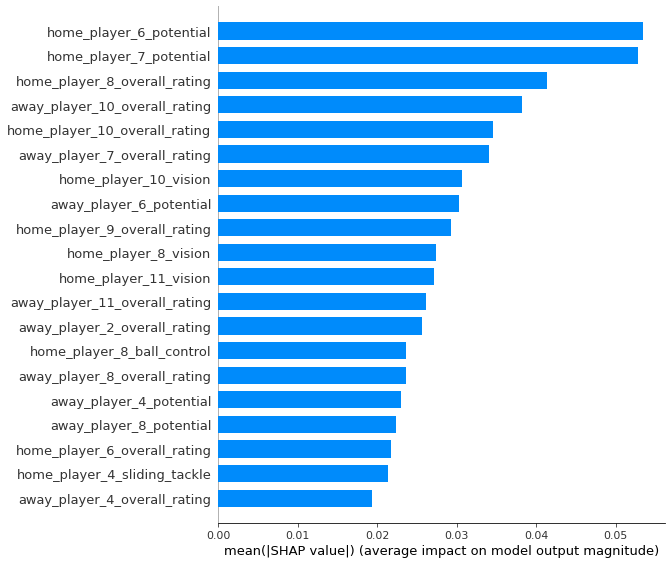

In [ ]:
shap.summary_plot(shap_values, x_values, plot_type="bar", feature_names=x_values.columns)

In [ ]:
## feature有点多跑的有点慢
#shap_interaction_values = shap.TreeExplainer(model2).shap_interaction_values(x_values)

In [ ]:
#shap.summary_plot(shap_interaction_values,x_values,feature_names=x_values.columns)

In [ ]:
#shap.dependence_plot("home_player_6_potential", shap_values, x_values, interaction_index="home_player_7_potential",feature_names=x_values.columns)

In [ ]:
mean_shap_feature_values = pd.DataFrame(shap_values, columns=x_values.columns).abs().mean(axis=0).sort_values(ascending=False)

In [ ]:
mean_shap_feature_values.to_csv("feature_importance.csv")

In [ ]:
top_40_var = list(mean_shap_feature_values.index)[:40]
x_train = x_values[top_40_var]

In [ ]:
from sklearn.linear_model import LinearRegression

variable_drop = []
accs_train_gbm = []
accs_train_logis_l2 = []

for i in range(40):
    print(i)
    df_temp_train = x_train.copy()
    if i > 0:
        x_train_feature = df_temp_train.drop(variable_drop, axis=1)
    else:
        x_train_feature = df_temp_train.copy()
    x_train_gbm, x_val_gbm, y_train_gbm, y_val_gbm = train_test_split(x_train_feature, y, train_size=0.85, random_state=1)
    params = {
      'boosting_type': 'gbdt',
      'objective': 'regression',
      'learning_rate': 0.01,
      'feature_fraction': 0.9,
      'bagging_fraction': 0.9,
      'bagging_freq': 5,
      'max_depth': 100,
      'seed': 1
    }
    lgb_train = lgb.Dataset(x_train_gbm, y_train_gbm, feature_name=list(x_train_feature.columns))
    lgb_eval = lgb.Dataset(x_val_gbm, y_val_gbm, feature_name=list(x_train_feature.columns))
    model_fea = lgb.train(params, lgb_train, num_boost_round=10000, valid_sets=[lgb_train, lgb_eval], 
                  valid_names=["train", "eval"], early_stopping_rounds=1500, verbose_eval=False)
    y_pred_lgb_train = model_fea.predict(x_train_feature, num_iteration=model_fea.best_iteration)
    acc_lgb_train = mean_squared_error(y, y_pred_lgb_train, squared=False)

    accs_train_gbm.append(acc_lgb_train)
#     lr = LinearRegression().fit(x_train_feature, y)
#     accs_train_logis_l2.append(mean_squared_error(y, lr.predict(x_train_feature), squared=False))

    # drop
    explainer = shap.TreeExplainer(model_fea)
    shap_values = explainer.shap_values(x_train_feature)
    mean_shap_feature_values = pd.DataFrame(shap_values, 
                                          columns=x_train_feature.columns).abs().mean(axis=0).sort_values(ascending=False)
    variable_drop.append(list(mean_shap_feature_values.index)[-1])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


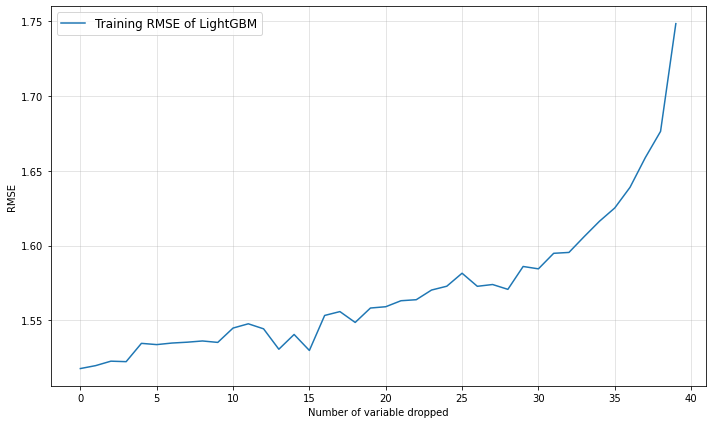

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(accs_train_gbm)), accs_train_gbm, label="Training RMSE of LightGBM")
plt.legend(fontsize=12)
plt.xlabel("Number of variable dropped")
plt.ylabel("RMSE")
plt.grid(':', alpha=0.4)
plt.tight_layout()
plt.show()

In [ ]:
top_40_var

['home_player_6_potential',
 'home_player_7_potential',
 'home_player_8_overall_rating',
 'away_player_10_overall_rating',
 'home_player_10_overall_rating',
 'away_player_7_overall_rating',
 'home_player_10_vision',
 'away_player_6_potential',
 'home_player_9_overall_rating',
 'home_player_8_vision',
 'home_player_11_vision',
 'away_player_11_overall_rating',
 'away_player_2_overall_rating',
 'home_player_8_ball_control',
 'away_player_8_overall_rating',
 'away_player_4_potential',
 'away_player_8_potential',
 'home_player_6_overall_rating',
 'home_player_4_sliding_tackle',
 'away_player_4_overall_rating',
 'away_player_4_standing_tackle',
 'home_player_7_overall_rating',
 'home_player_2_overall_rating',
 'away_player_9_potential',
 'home_player_9_volleys',
 'home_player_10_potential',
 'away_player_3_overall_rating',
 'home_player_2_vision',
 'home_player_6_vision',
 'home_player_3_long_passing',
 'home_player_11_volleys',
 'home_player_4_reactions',
 'home_player_11_overall_rating',
